## Homework 4
Hi everyone this is your fourth homework.

In this exercise, You will deal with **SVM**, **Decision Tree**.

You are free to discuss the problems and ways to approach them with your classmates, but be sure to not cheat. **Cheating will not be tolerated**.

# Support Vector Machine (SVM)

**A Support Vector Machine (SVM)** is a supervised machine learning algorithm that can be used for both classification and regression tasks. The primary objective of SVM is to find a hyperplane in an N-dimensional space (where N is the number of features) that distinctly classifies data points into different classes.

Here are some key concepts associated with SVM:

**Hyperplane:**

In a two-dimensional space, a hyperplane is a line that separates the data into different classes. In higher-dimensional spaces, it becomes a hyperplane.

**Support Vectors:**

Support Vectors are the data points that are closest to the decision boundary (hyperplane) and have a significant influence on its position. These points play a crucial role in defining the optimal hyperplane.

**Margin:**

The margin is the distance between the hyperplane and the nearest data point from either class. SVM aims to maximize this margin because a larger margin generally leads to better generalization performance.

**Kernel Trick:**

SVMs can handle non-linear decision boundaries by using a technique called the kernel trick.

**C Parameter:**

SVM has a parameter denoted as 'C,' which controls the trade-off between having a smooth decision boundary and classifying training points correctly. A smaller C value makes the decision boundary smoother, while a larger C value may lead to a more accurate classification of training points.

**Linear and Non-linear SVM:**

SVMs can be applied with linear and non-linear kernels. Linear SVM is suitable for linearly separable data, while non-linear SVM with kernels like Polynomial or Radial Basis Function (RBF) can handle more complex, non-linear relationships.

## <font color="red">**Question 1**</font>
In this question you are going to work with the iris dataset.
This dataset contains 3 classes, each of which has 50 members, and each class refers to a type of lily flower. Each element contains information about the length and width of the sepal and the length and width of the petal. Also, the data is labeled and its class is also known. You can refer to this [link](https://archive.ics.uci.edu/dataset/53/iris) for more details.


- First, separate the data using the linear kernel and express the correlation matrix of the recall, precision, and F1 score values.

To do this on the iris dataset, first take the first two features of all the data and then classify using the linear kernel. At the end, display the data graph with the labels of the corresponding classes as well as the separating lines of each class

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import classification_report
from sklearn import datasets, svm
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
# Exclude the first two features
X = iris.data[:, 0:2]
y = iris.target
X.shape,y.shape

((150, 2), (150,))

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [4]:
# Initialize the SVM model with a linear kernel
model = svm.SVC(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.88      0.64      0.74        11
           2       0.73      0.92      0.81        12

    accuracy                           0.83        30
   macro avg       0.87      0.85      0.85        30
weighted avg       0.85      0.83      0.83        30



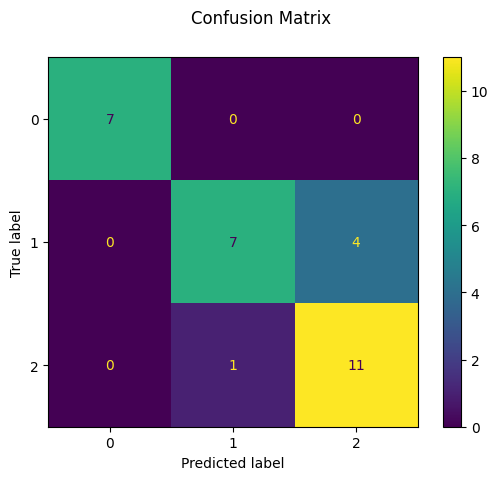

In [5]:
#Classification report
print(classification_report(y_test, y_pred))
#ploting
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

Scatter Plot for Training Data

<Axes: >

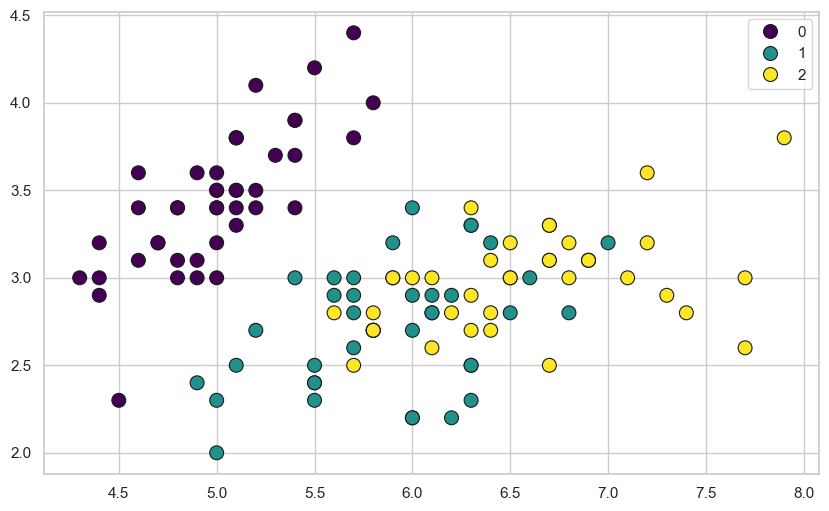

In [6]:
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Display separating lines and data points using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='viridis', edgecolor='k', marker='o', s=100)

Scatter Plot for Test Data (Prediction)

<Axes: >

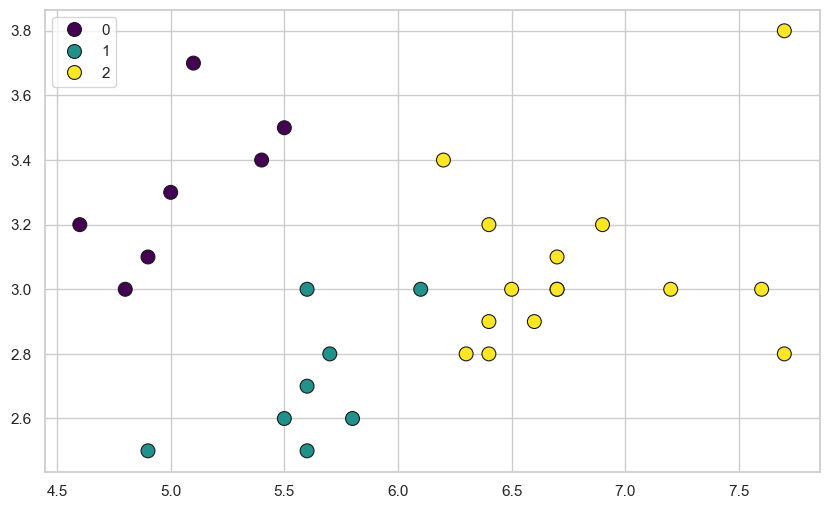

In [7]:
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Display separating lines and data points using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='viridis', edgecolor='k', marker='o', s=100)

- Research about polynomial, linear, and rbf kernels and state which datasets each one is suitable for classification. Apply the classification to the items in the previous section and analyze the results.

**Kernel Function :**

Kernel functions are mathematical functions that transform the input data into a higher-dimensional feature space, where the data can be more easily separated by a linear classifier. Kernel functions can capture complex and nonlinear patterns in the data, such as curves, circles, and spirals.

<hr>

**Linear Kernel :**

The linear kernel is suitable for linearly separable datasets. It assumes that the classes can be separated by a hyperplane.

Linear kernels are effective when the relationship between features and classes is approximately linear.

Since the Iris dataset is relatively well-separated and linearly separable, a linear kernel can be suitable for this dataset.

**Polynomial Kernel :**

The polynomial kernel allows for non-linear decision boundaries by introducing polynomial terms. It includes a degree parameter to control the complexity of the decision boundary.

Polynomial kernels are suitable for datasets with complex, non-linear relationships between features and classes.

While the Iris dataset is not highly non-linear, a polynomial kernel can still be applied to capture potential non-linearities in the data.

**RBF Kernel:**

The RBF kernel is highly versatile and can capture complex, non-linear relationships. It introduces a gamma parameter to control the influence of individual data points on the decision boundary.

RBF kernels are effective for datasets with intricate, non-linear patterns and are often the default choice when the nature of the data is not known.

The Iris dataset is not excessively complex, but RBF kernels can still provide a good fit, capturing any non-linearities that may exist.

<font color="green">**Answer:**</font>

I write a function for this section (this function is similiar to above codes but it's get the kernel name to train diffrent kernel tricks)

In [8]:
def train_and_fit_kernels(X_train, y_train, X_test, y_test, kernel_name):
        
    # Initialize the SVM model with a linear kernel
    model = svm.SVC(kernel=kernel_name)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    #Classification report
    print(classification_report(y_test, y_pred))

    print(kernel_name)

    #ploting
    confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    confussion_matrix.figure_.suptitle("Confusion Matrix")
    plt.show()
    

**Fit for two first features**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.88      0.64      0.74        11
           2       0.73      0.92      0.81        12

    accuracy                           0.83        30
   macro avg       0.87      0.85      0.85        30
weighted avg       0.85      0.83      0.83        30

linear


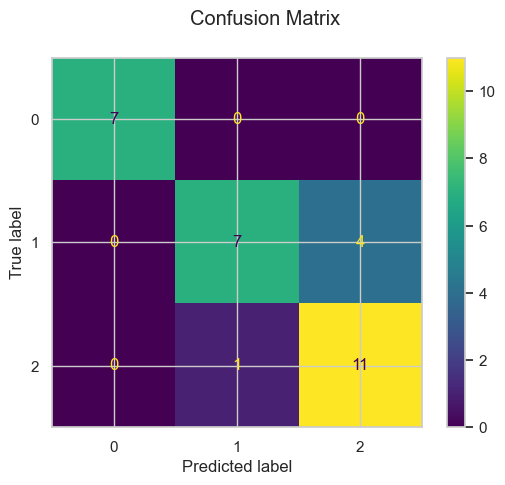

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.70      0.64      0.67        11
           2       0.69      0.75      0.72        12

    accuracy                           0.77        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.77      0.77      0.77        30

poly


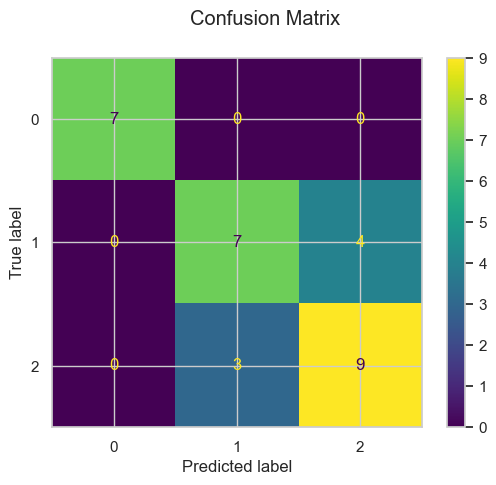

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.88      0.64      0.74        11
           2       0.73      0.92      0.81        12

    accuracy                           0.83        30
   macro avg       0.87      0.85      0.85        30
weighted avg       0.85      0.83      0.83        30

rbf


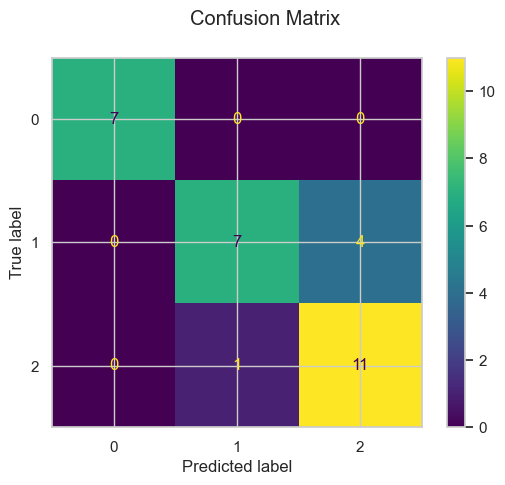

In [9]:
# Apply and visualize each kernel
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    train_and_fit_kernels(X_train, y_train, X_test, y_test, kernel)

This code make `decision_boundry` display 

I use it from `sklearn documentation` to plot

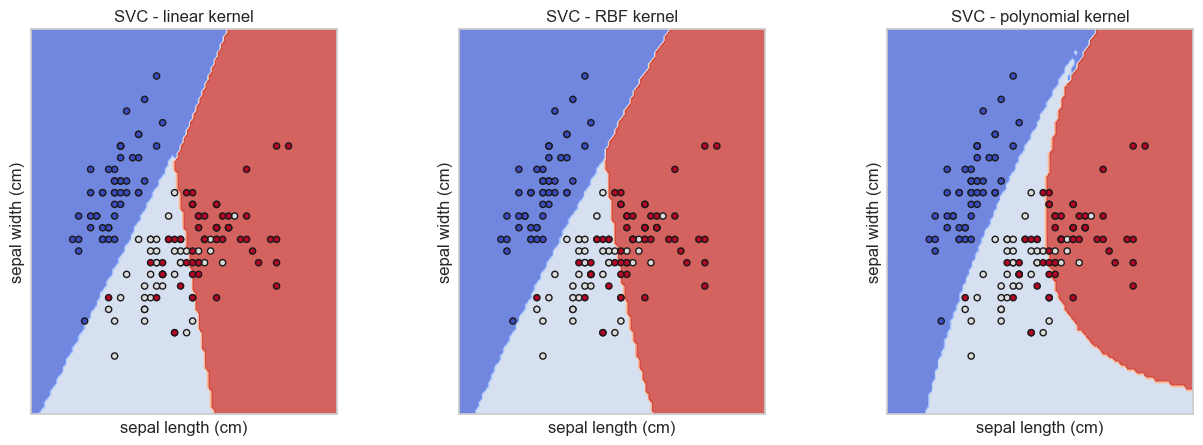

In [10]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

models = (
    svm.SVC(kernel="linear"),
    svm.SVC(kernel="rbf"),
    svm.SVC(kernel="poly"),
)
models = (clf.fit(X_train, y_train) for clf in models)

# title for the plots
titles = (
    "SVC - linear kernel",
    "SVC - RBF kernel",
    "SVC - polynomial kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,  # Use the test set for plotting the decision boundary
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


**Explain the Result**

1. **SVC - Linear Kernel:**

   The decision boundary is a straight line, as the linear kernel assumes that the classes can be separated by a hyperplane. In this case, it attempts to find a linear boundary in the feature space defined by the petal length and petal width.
   
   The linear kernel is suitable when the relationship between features and classes is approximately linear. It appears effective for the Iris dataset, which is relatively well-separated in the chosen feature space.

2. **SVC - RBF (Radial Basis Function) Kernel:**

   The decision boundary is non-linear and more flexible compared to the linear kernel. It can capture complex relationships in the data, as evidenced by the curves in the decision boundary.

   The RBF kernel is versatile and effective for datasets with intricate, non-linear patterns. It tends to perform well when the underlying structure of the data is not well-known in advance.

3. **SVC - Polynomial Kernel:**

   The decision boundary is polynomial, introducing curves and regions of different shapes. The degree of the polynomial can be adjusted to control the complexity of the decision boundary.

   The polynomial kernel is suitable for datasets with complex, non-linear relationships. The choice of the polynomial degree is crucial in balancing model complexity and performance.


<hr>


- Research regularization, Gamm a hyperparameters. Change each of the hyperparameters 3 times and repeat the classification for each. Analyze the effect of each hyperparameter on the classification.

**```C``` hyperparameter**

The C parameter is inversely proportional to the margin size, this means that the larger the value of C, the smaller the margin, and, conversely, the smaller the value of C, the larger the margin. The C parameter can be used along with any kernel, it tells the algorithm how much to avoid misclassifying each training sample, due to that, it is also known as regularization.

![](https://s3.stackabuse.com/media/articles/understanding-svm-hyperparameters-1.png)

**```Gamma``` hyperparameter**

Infinite decision boundaries can be chosen, some of those boundaries will separate the classes and others won't. When choosing an effective decision boundary should the first 10 nearest points of each class be considered? Or should more points be considered, including the points that are far away? In SVM, that choice of range is defined by another hyperparameter, gamma.

Like C, gamma is somewhat inversely proportional to its distance. The higher its value, the closest are the points that are considered for the decision boundary, and the lowest the gamma, the farther points are also considered for choosing the decision boundary.

Another impact of gamma, is that the higher its value, the more the scope of the decision boundary gets closer to the points around it, making it more jagged and prone to overfit - and the lowest its value, the smoother and regular the decision boundary surface gets, also, less prone to overfit. This is true for any hyperplane, but can be easier observed when separating data in higher dimensions

![](https://s3.stackabuse.com/media/articles/understanding-svm-hyperparameters-5.png)

In [11]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#This function make decision_boundry display 
#I use it from sklearn documentation to plot
def decision_boundry_display(models, titles):
    models = (clf.fit(X, y) for clf in models)

    # Set-up 1x3 grid for plotting.
    fig, sub = plt.subplots(2, 3, figsize=(30, 10))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]

    for clf, title, ax in zip(models, titles, sub.flatten()):
        disp = DecisionBoundaryDisplay.from_estimator(
            clf,
            X,
            response_method="predict",
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=ax,
            xlabel=iris.feature_names[0],
            ylabel=iris.feature_names[1],
        )
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()

#This function is for train and fit svm model (for diffrent hyperparameters)
def train_and_fit_svm(X_train, y_train,X_test, y_test, kernel='linear', C_param=1.0, gamma_param='scale'):    
    # Initialize the SVM model with the specified kernel, C, and gamma
    model = svm.SVC(kernel=kernel, C=C_param, gamma=gamma_param)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print classification report
    print(f"Classification Report (C={C_param}, gamma={gamma_param}):")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    confusion_matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    confusion_matrix.figure_.suptitle("Confusion Matrix")
    plt.show()

**For first two features**

Classification Report (C=0.1, gamma=scale):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.78      0.64      0.70        11
           2       0.71      0.83      0.77        12

    accuracy                           0.80        30
   macro avg       0.83      0.82      0.82        30
weighted avg       0.80      0.80      0.80        30



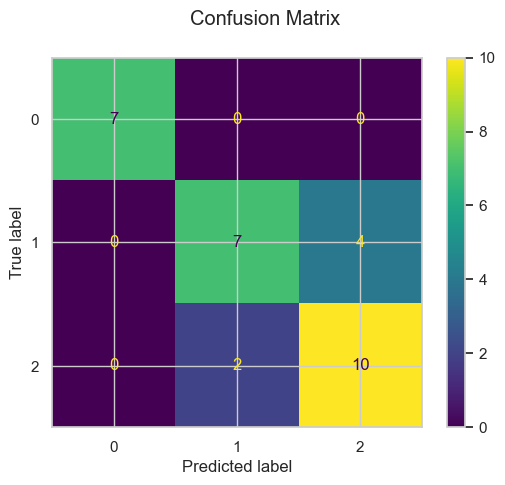

Classification Report (C=10.0, gamma=scale):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.88      0.64      0.74        11
           2       0.73      0.92      0.81        12

    accuracy                           0.83        30
   macro avg       0.87      0.85      0.85        30
weighted avg       0.85      0.83      0.83        30



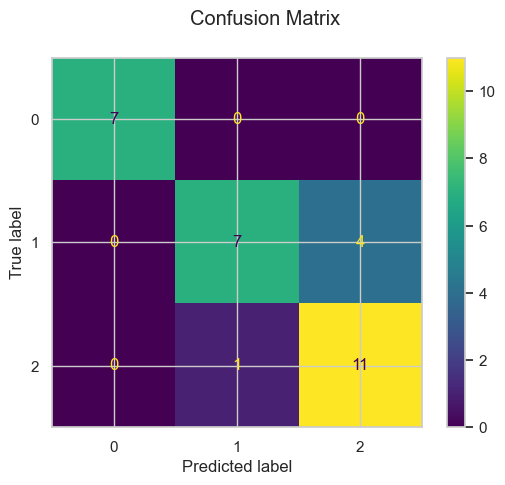

Classification Report (C=100.0, gamma=scale):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.88      0.64      0.74        11
           2       0.73      0.92      0.81        12

    accuracy                           0.83        30
   macro avg       0.87      0.85      0.85        30
weighted avg       0.85      0.83      0.83        30



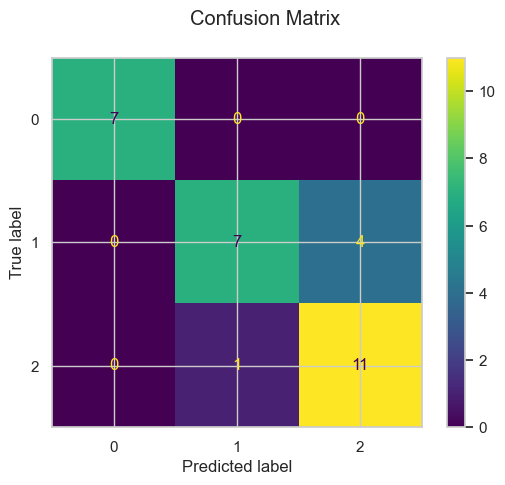

Classification Report (C=1.0, gamma=0.1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.88      0.64      0.74        11
           2       0.73      0.92      0.81        12

    accuracy                           0.83        30
   macro avg       0.87      0.85      0.85        30
weighted avg       0.85      0.83      0.83        30



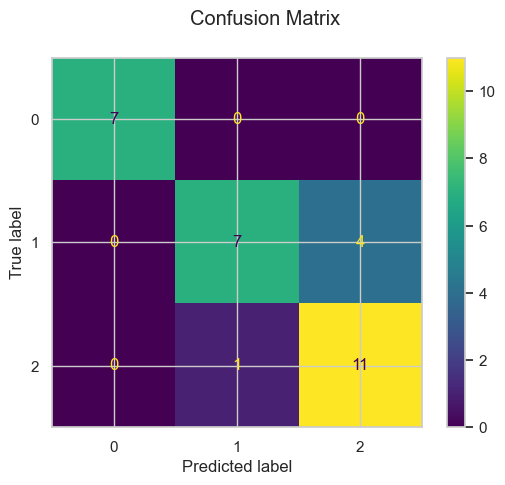

Classification Report (C=1.0, gamma=1.0):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.88      0.64      0.74        11
           2       0.73      0.92      0.81        12

    accuracy                           0.83        30
   macro avg       0.87      0.85      0.85        30
weighted avg       0.85      0.83      0.83        30



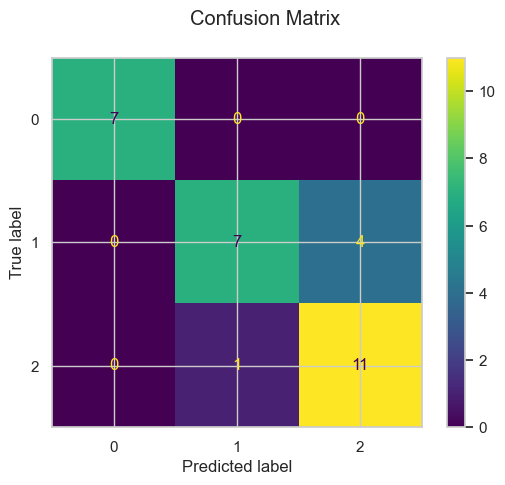

Classification Report (C=1.0, gamma=100.0):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.88      0.64      0.74        11
           2       0.73      0.92      0.81        12

    accuracy                           0.83        30
   macro avg       0.87      0.85      0.85        30
weighted avg       0.85      0.83      0.83        30



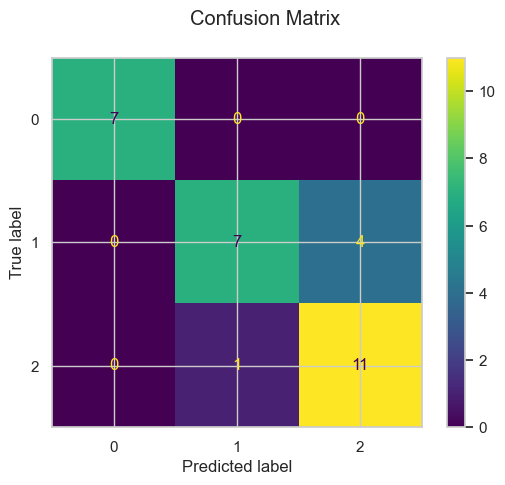

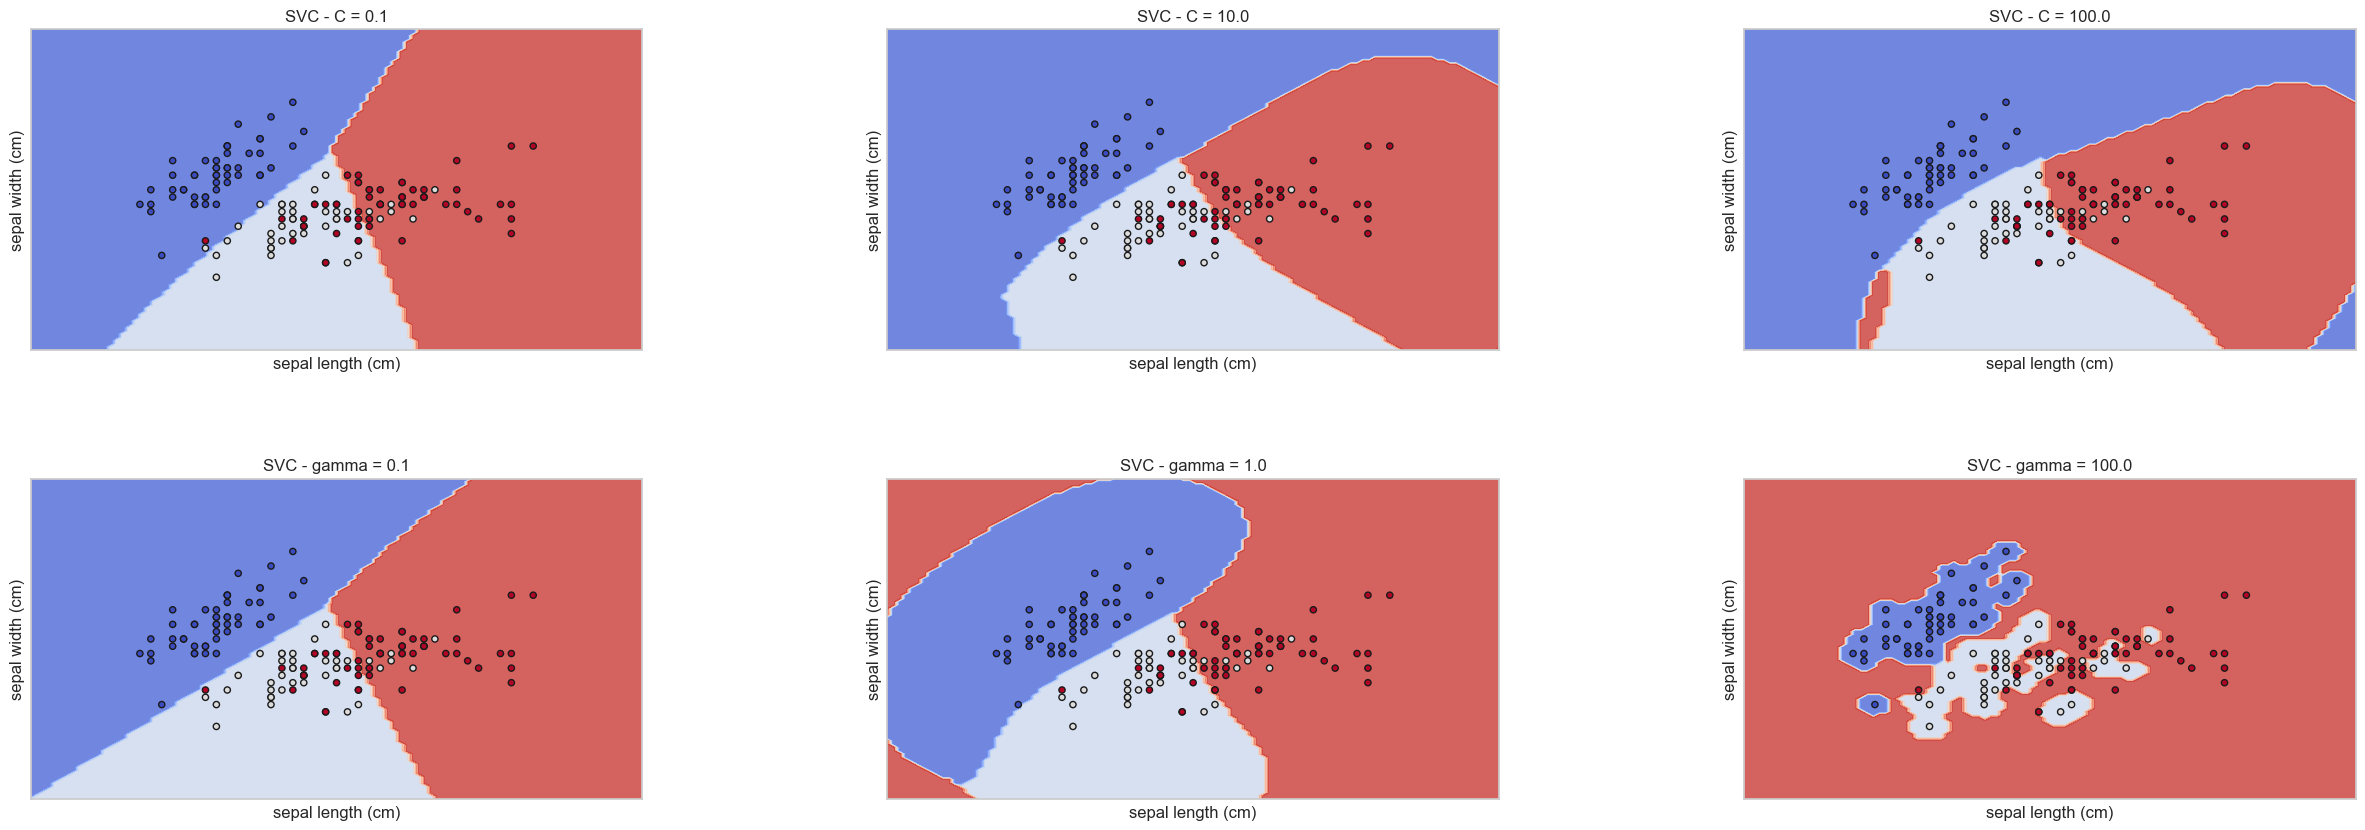

In [12]:
# Test with different hyperparameters
hyperparameters = [
    {'C': 0.1, 'gamma': 'scale'},
    {'C': 10.0, 'gamma': 'scale'},
    {'C': 100.0, 'gamma': 'scale'},
    {'C': 1.0, 'gamma': 0.1},
    {'C': 1.0, 'gamma': 1.0},
    {'C': 1.0, 'gamma': 100.0},
]

for hyperparams in hyperparameters:
    train_and_fit_svm(X_train, y_train, X_test, y_test, C_param=hyperparams['C'], gamma_param=hyperparams['gamma'])


all_models = (
    svm.SVC(kernel=kernel, C=0.1),
    svm.SVC(kernel=kernel, C=10.0),
    svm.SVC(kernel=kernel, C=100.0),
    svm.SVC(kernel=kernel, gamma=0.1),
    svm.SVC(kernel=kernel, gamma=1.0),
    svm.SVC(kernel=kernel, gamma=100.0),
)

# title for the plots
all_titles = (
    "SVC - C = 0.1",
    "SVC - C = 10.0",
    "SVC - C = 100.0",
    "SVC - gamma = 0.1",
    "SVC - gamma = 1.0",
    "SVC - gamma = 100.0",
)

decision_boundry_display(all_models, all_titles)


<hr>

- Calculate the best parameters of the previous part with the help of grid search and repeat the classification for the kernels you checked in the third part and analyze the results.

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Create an SVM classifier
svm_classifier = svm.SVC()

# Perform grid search
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


**Explain the ```GridSearch``` result**

1. **C (Regularization Parameter):**

   `C` is set to 0.1. A smaller value of `C` indicates a preference for a larger-margin decision boundary, allowing for some misclassifications in the training data.
   
   With `C=0.1`, the model is more tolerant of misclassifications and aims for a simpler decision boundary. This can be suitable when the data has a certain level of noise, and a more generalized model is desired.

   The choice of `C` depends on the trade-off between fitting the training data precisely and having a more generalized model. In this case, the preference is towards a more generalized model.

2. **Gamma (Kernel Coefficient):**

   `Gamma` is set to 0.1. A smaller value of `gamma` implies a smoother decision boundary, making the model less sensitive to variations in the training data.

   With `gamma=0.1`, the model aims for a more generalized decision boundary. It is suitable when the underlying patterns in the data are relatively simple and a smoother boundary is preferred to avoid overfitting.

   Adjust `gamma` based on the complexity of the data. Lower values, such as 0.1 in this case, are chosen for simpler patterns.

3. **Kernel Function (Type of Kernel):**

   The choice of `kernel` is 'linear', indicating a linear kernel function. It transforms the input features into a higher-dimensional space using a linear transformation.

   The linear kernel is appropriate when the relationship between features and classes is approximately linear. It aims to find a straight-line decision boundary in the original feature space.

   The selection of the kernel depends on the nature of the data. In this case, 'linear' is chosen, indicating that a linear relationship is assumed.

In summary, the hyperparameter set `{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}` suggests a preference for a simpler, larger-margin decision boundary with a smoother transition between classes.

**Predict by Best parameter - First part of data**

Classification Report (C=0.1, gamma=0.1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.78      0.64      0.70        11
           2       0.71      0.83      0.77        12

    accuracy                           0.80        30
   macro avg       0.83      0.82      0.82        30
weighted avg       0.80      0.80      0.80        30



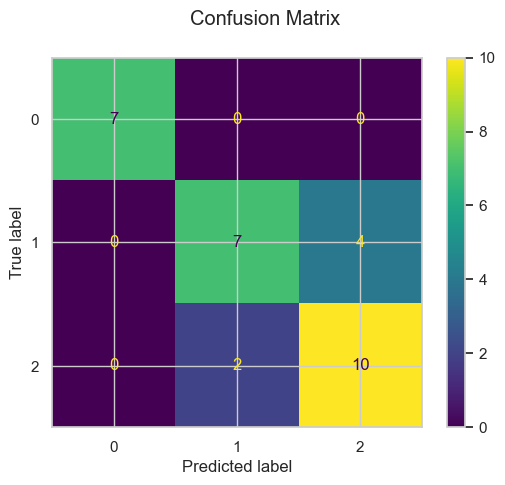

In [14]:
train_and_fit_svm(X_train, y_train, X_test, y_test, kernel='linear', C_param=0.1, gamma_param=0.1)

<hr>

# SVM Regression

**Support Vector Machine (SVM) regression**, also known as Support Vector Regression (SVR), is a type of machine learning algorithm that is used for regression tasks. While traditional SVMs are designed for classification, SVR extends the concept to predict continuous values, making it suitable for regression problems where the goal is to predict a numeric output rather than class labels. The primary idea behind SVM regression is to find a hyperplane that best represents the relationship between the input features and the continuous target variable


## <font color="red">**Question 2**</font>

In this question, we want to solve an SVR problem with the help of the attached data set of people's income based on their job position. This data set contains three columns, in the first column their job position is described, in the second column is the work rank, and in the third column is the amount of income. In this question, with the help of three kernels **rbf, linear and polynomial**, predict the income of people and display the estimated and actual values in a graph.

Import **Data.csv** as a dataset for this question.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import seaborn as sns

In [16]:
jobs = pd.read_csv('./Data.csv')
jobs

Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000

**About dataset**

we don't have any null values . It's good.

In [17]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [18]:
jobs.describe()

Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000

In ```Position``` column we have a ordinal relationship so we can do ```ordinal encoding``` for this column but if do this it's become quite similar to level column.
so we can drop the ```position``` column

In [19]:
jobs.drop(columns=['Position'], inplace=True)

In under plots we can see a non-linear relationship beetwen level and salary.

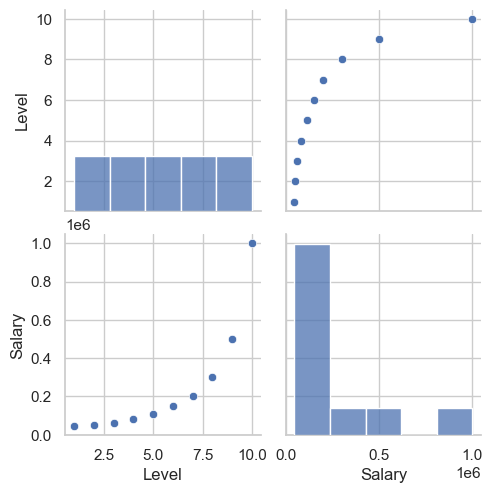

In [20]:
sns.pairplot(jobs)

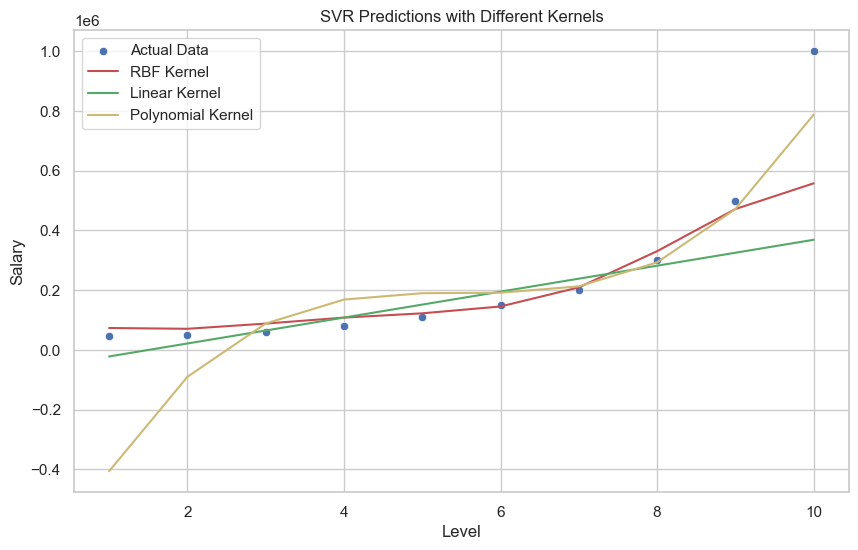

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Getting X and y variable
# use reshape to ensure that regardless of the initial shape of the array, it gets reshaped into a single column (1D array).
X = jobs.Level.values.reshape(-1, 1)
y = jobs.Salary.values.reshape(-1, 1)

# Standard scaling
std_scaler_X = StandardScaler()
std_scaler_y = StandardScaler()

X_scaled = std_scaler_X.fit_transform(X)
y_scaled = std_scaler_y.fit_transform(y)

# Creating SVR models for different kernels
svr_rbf = SVR(kernel='rbf')
svr_linear = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')

# Fitting the data for each kernel
svr_rbf.fit(X_scaled, y_scaled.ravel())
svr_linear.fit(X_scaled, y_scaled.ravel())
svr_poly.fit(X_scaled, y_scaled.ravel())

# Plotting with Seaborn
plt.figure(figsize=(10, 6))

# Actual Data
sns.scatterplot(x=X.flatten(), y=y.flatten(), color='b', label='Actual Data')

# Predictions for each kernel
sns.lineplot(x=X.flatten(), y=std_scaler_y.inverse_transform(svr_rbf.predict(X_scaled).reshape(-1, 1)).flatten(), color='r', label='RBF Kernel')
sns.lineplot(x=X.flatten(), y=std_scaler_y.inverse_transform(svr_linear.predict(X_scaled).reshape(-1, 1)).flatten(), color='g', label='Linear Kernel')
sns.lineplot(x=X.flatten(), y=std_scaler_y.inverse_transform(svr_poly.predict(X_scaled).reshape(-1, 1)).flatten(), color='y', label='Polynomial Kernel')

plt.xlabel('Level')
plt.ylabel('Salary')
plt.title("SVR Predictions with Different Kernels")
plt.legend()
plt.show()


**Explaination of Result**

Based on the three lines (`RBF`, `Linear`, and `Polynomial`) to assess how well each kernel captures the underlying patterns in the data.

The `RBF` kernel fits the data well, because data is non-linear, it might be the best choice.

The `linear` kernel is not suitable because the relationship is not linear, and the line not fits the data.

The `polynomial` kernel may be useful if there are non-linearities that can be better captured with a polynomial function.
But in the above graph it's not fit on the data.

So based on the result the `Rbf` kernel is the best choice for this data.

<hr>

# Decision Tree

A **Decision Tree** is a popular supervised machine learning algorithm used for both classification and regression tasks. It works by recursively partitioning the data into subsets based on the values of input features, ultimately assigning a label or predicting a target variable for each observation. Decision Trees have several advantages, including simplicity, interpretability, and the ability to handle both numerical and categorical data. However, they can be sensitive to noise and outliers.

## <font color="red">**Question 3**</font>

- What is pruning in the context of Decision Trees? Why is it done, and how does it contribute to preventing overfitting?


<font color="green">**Answer:**</font>

`Overfitting` is a common problem with Decision Trees. `Pruning` consists of a set of techniques that can be used to simplify a Decision Tree, and enable it to generalise better. Pruning Decision Trees falls into 2 general forms: `Pre-Pruning` and `Post-Pruning`.

The core objective of pruning is to strike a balance between model complexity and predictive accuracy. By eliminating unnecessary branches that may lead to overfitting, the pruned Decision Tree becomes more robust and better equipped to make accurate predictions on new, unseen data.


**The goals of `Pruning` :**

- Enhance Generalization: 

By removing unnecessary details that might be specific to the training data, pruning ensures that the Decision Tree is better equipped to generalize well to unseen data.

- Prevent Overfitting: 

The selective removal of branches helps prevent the model from capturing noise or outliers during training, promoting a more robust and reliable predictive performance.

- Optimize Model Performance: 

Striking the right balance between complexity and accuracy, pruning contributes to the creation of a Decision Tree that is not only well-fitted to the training set but also capable of making accurate predictions in real-world scenarios.


**In this way, `Pruning` prevents overfitting:**

- Simplicity Promotion: 

Pruning encourages the development of a simpler tree structure by eliminating unnecessary branches that may have formed to accommodate noise in the training data. A simpler tree is less likely to fit the training data too closely, promoting a more generalized model.

- Noise Reduction: 

By selectively removing branches that capture noise or outliers in the training set, pruning ensures that the Decision Tree focuses on genuine patterns in the data. This reduction in noise contributes to a more robust and reliable model that is better equipped to handle variations in new data.

- Generalization Improvement: 

Pruned Decision Trees are more adept at generalizing to previously unseen data. The removal of specific branches that were tailored to idiosyncrasies in the training set allows the model to make predictions based on broader, more applicable patterns, leading to improved generalization performance.

<hr>


- How does the application of Decision Trees differ in regression tasks compared to classification tasks? What is predicted at the leaf nodes in regression?




<font color="green">**Answer:**</font>

A `Decision tree` is a type of tree-based model used for classification and segmentation problems, where the goal is to predict a categorical outcome. The model works by recursively splitting the data into subsets based on the most significant predictor variables, until a leaf node is reached, where the prediction is made based on the majority class in the leaf node.

A `regression Decision tree`, on the other hand, is used for regression problems, where the goal is to predict a continuous numerical outcome. In a regression tree, the data is split based on the predictor variables until the leaf nodes represent homogeneous subsets of the data with respect to the target variable. The prediction is made by averaging the target variable in each leaf node.


**The prediction at a leaf node in a regression tree is typically determined by:**

- `Mean or Median`: 

One common approach is to assign the mean or median value of the target variable within the data points that reach that particular leaf. This means that for any input falling into that leaf node, the predicted value is the average or median of the observed target values of the training instances that reached that leaf.

- `Weighted Average`: 

In some cases, a weighted average may be used, considering the distribution or weights of the target values within the leaf.

- `Constant Value`: 

Alternatively, a constant value might be assigned based on statistical considerations or optimization criteria during the training process.

<hr>

## <font color="red">**Question 4**</font>

In this question, you will work with the **Diabetes.csv** dataset to classify diabetics and non-diabetics.

- First, divide the data into the most and test data with a ratio of 7 to 3 and apply a decision tree on them. Report and compare accuracy for test and training data.

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [24]:
diabets = pd.read_csv('./Diabetes.csv')
diabets.head()

pregnant  glucose  BP  skin  insulin   BMI  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

In [25]:
# Separate features and target variable (label)
X = diabets.drop('label', axis=1)
y = diabets['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [26]:
#Initialize a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=27)

#Train the model on the training data
model.fit(X_train, y_train)

#Predict labels for both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Evaluate accuracy on both sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

#Report and compare accuracy
print("Accuracy - Training data :", accuracy_train)
print("Accuracy - Test data :", accuracy_test)

Accuracy - Training data : 1.0
Accuracy - Test data : 0.6883116883116883


- Display the decision tree you created using the available libraries.

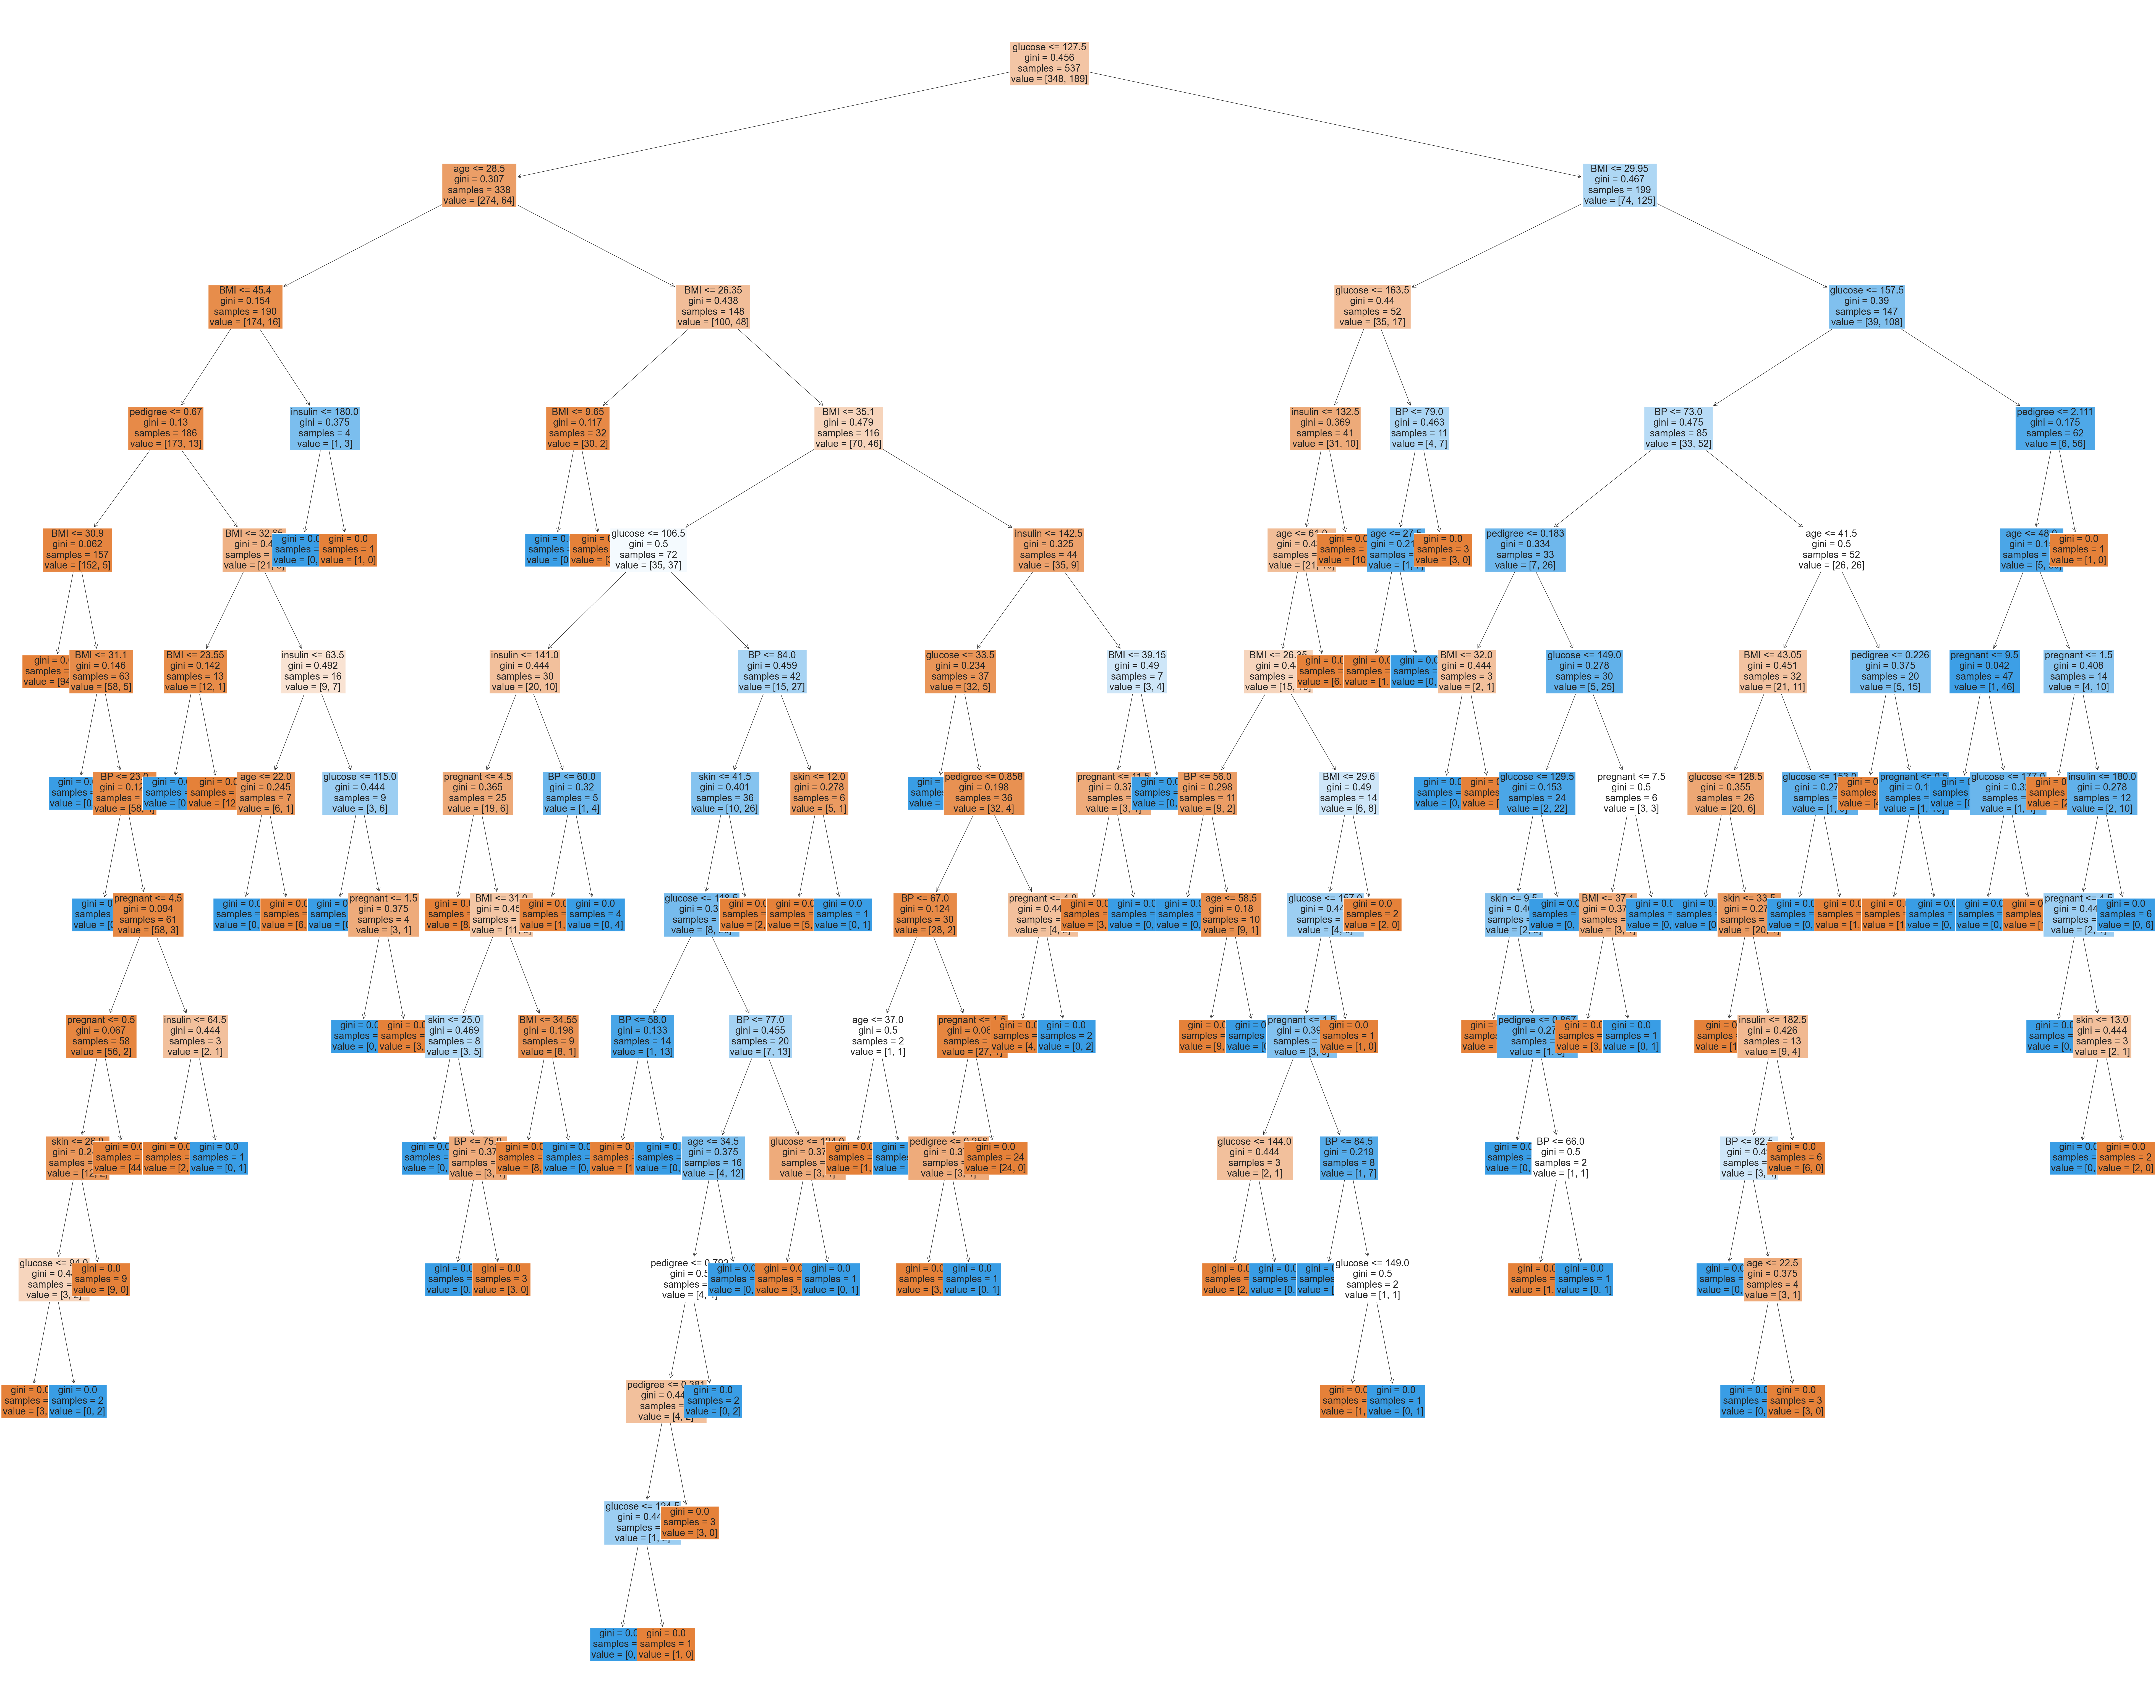

In [27]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (100,80))
tree.plot_tree(model,feature_names = diabets.columns, filled = True,fontsize=25);

- Now design a tree whose maximum depth = 2. Compare the accuracy values for the test and training data reported with the results obtained in the first part.

In this part we use a technique to prevent `Overfitting`.

This technique name is `Pre-Pruning`.

`Pre-Pruning` : In such a case, from the beginning and during the construction of the tree, we make sure that it does not get complicated.

One of the `Pre-Pruning` technique is control the `max-depth` of decision tree

controlling the `max_depth` parameter in a decision tree is a crucial aspect of model tuning to balance model complexity and overfitting. The `max_depth` parameter determines the maximum depth of the decision tree, controlling the number of nodes and splits it can have. This is essential for managing the trade-off between capturing intricate patterns in the training data and ensuring the model's ability to generalize well to unseen data.


**`Training accuracy` and `Test accuracy`:**

in this part(the model tha have control the `max_depth`) we can see the test accuracy is increased (Generalization) it's mean the model can be better for unseen data and can have good prediction for new data that don't have seen before.

and in previous part in training accuracy we had 100% accuracy but in test accuracy we lose to 68% it showed the `Overfitting`.


In [28]:
#Initialize a Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=2, random_state=27)

#Train the model on the training data
model.fit(X_train, y_train)

#Predict labels for both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Evaluate accuracy on both sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

#Report and compare accuracy
print("Accuracy - Training data :", accuracy_train)
print("Accuracy - Test data :", accuracy_test)

Accuracy - Training data : 0.776536312849162
Accuracy - Test data : 0.7619047619047619


- Display the tree from the previous section and compare it with the results of section b in terms of interpretability.

In this part we can see our decision tree is much smaller and prediction just based on three features(`glucose`, `age`, `bmi`) , because we control the `max_depth` , this technique help us to control the `Ovefitting` of model.

But in previous model we have a large Tree that predict by most of features and `max_depth` of tree is not controled (This maybe become to be `overfitting`) , and it caused our model is overfitted.

The number of features that are not related to the `max_depth` of the tree but can indirectly affect it, for example, in the previous model tree, some features were examined several times, and this caused our model to `overfit`.

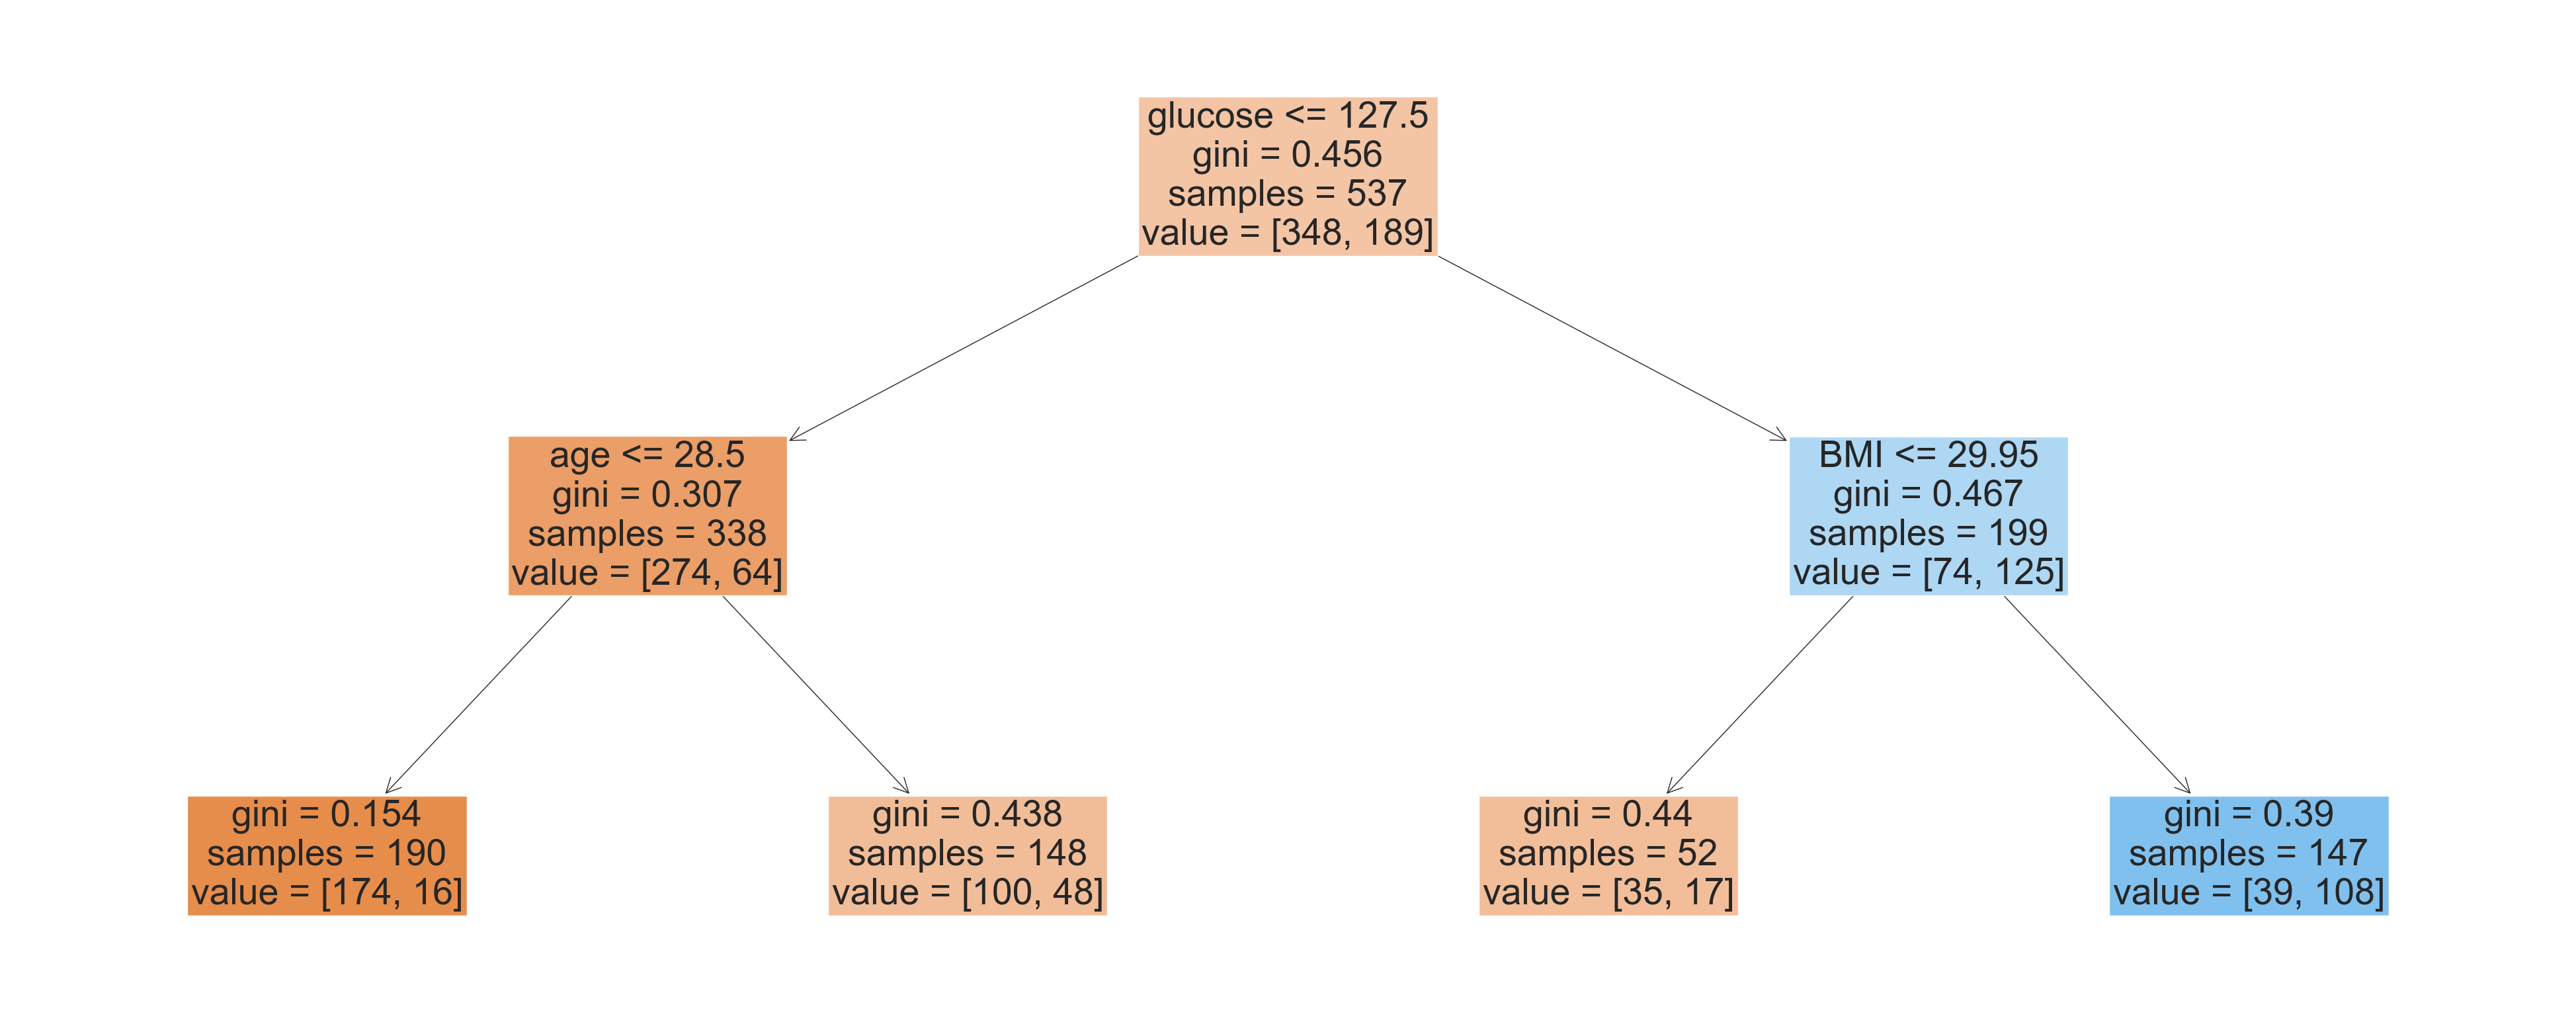

In [29]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,20))
tree.plot_tree(model, feature_names = diabets.columns, filled = True,fontsize=40);

<hr>

## <font color="red">**Question 5**</font>

In this problem, You deal with **OJ** dataset.

The orange juice (OJ) data set is about customer purchases for the Citrus Hill and Minute Maid brands of orange juice.

Target column is *Purchase*

In [30]:
from ISLP import load_data
import numpy as np
oj = load_data('OJ')

In [31]:
oj['Store7'] = oj['Store7'].map({'Yes': 1, 'No': 0})
oj.head()

Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0       CH             237        1     1.75     1.99    0.00     0.0   
1       CH             239        1     1.75     1.99    0.00     0.3   
2       CH             245        1     1.86     2.09    0.17     0.0   
3       MM             227        1     1.69     1.69    0.00     0.0   
4       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  \
0          0          0  0.500000         1.99         1.75       0.24   
1          0          1  0.600000         1.69         1.75      -0.06   
2          0          0  0.680000         2.09         1.69       0.40   
3          0          0  0.400000         1.69         1.69       0.00   
4          0          0  0.956535         1.69         1.69       0.00   

   Store7  PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0       0   0.000000   0.000000           0.24      1  
1       0   0.150754   0.000000           0.24      1  
2       0   0.000000   0.091398           0.23      1  
3       0   0.000000   0.000000           0.00      1  
4       1   0.000000   0.000000           0.00      0

- Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [32]:
random_choice = np.random.choice(oj.shape[0], size=800, replace=True)

train_data = oj.iloc[random_choice]
test_data = oj.iloc[~random_choice]

- Fit a tree to the training data, with Purchase as the response and the other variables except for Buy as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate?

**Concept of Training Error rate:**

The training error rate is a metric used to assess the performance of a predictive model on the same dataset it was trained on. It measures the proportion of incorrect predictions made by the model when applied to the training data. The training error rate provides insights into how well the model has learned the patterns and relationships within the training dataset. The formula for calculating the training error rate is as follows:

$ \text{Training Error Rate} = \frac{\text{Number of Incorrect Predictions on Training Data}}{\text{Total Number of Predictions on Training Data}} \times 100\% $

In the context of a classification problem, the training error rate indicates the percentage of misclassifications made by the model on the data used for training. A lower training error rate suggests that the model is fitting well to the training data, capturing its underlying patterns and relationships.

While a low training error rate is desirable, it's important to interpret this metric with caution. Achieving a very low training error rate does not necessarily guarantee that the model will perform well on new, unseen data. Overfitting is a common concern where a model learns the noise or specific details of the training data but fails to generalize well to new instances.


In [40]:
#Set X and Y as features and target in Train data
X_train = train_data.drop(columns = ['Purchase'])
y_train = train_data['Purchase']

#Set X and Y as features and target in Test data
X_test = test_data.drop(columns = ['Purchase'])
y_test = test_data['Purchase']

Training Error Rate : 0.010000000000000009
Classification Report for Training Data
              precision    recall  f1-score   support

          CH       0.99      0.99      0.99       474
          MM       0.99      0.98      0.99       326

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



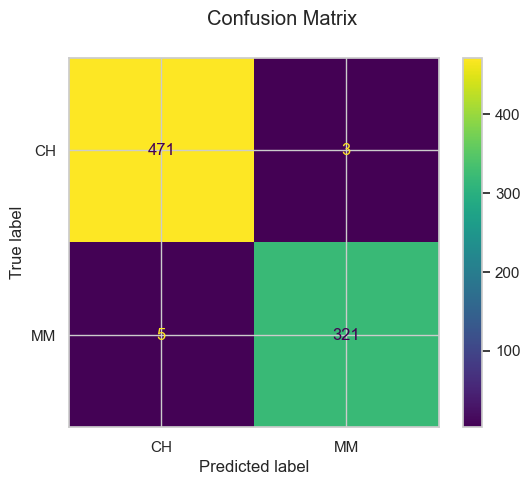

In [48]:
#Creat Decision Tree model
model = DecisionTreeClassifier(random_state=27)
#fit the model
model.fit(X_train, y_train)

# Make predictions on the training data
train_predictions = model.predict(X_train)

# Calculate training error rate using accuracy_score
training_error_rate = 1 - accuracy_score(y_train, train_predictions)

# Display the confusion matrix and test error rate
print("Training Error Rate :", training_error_rate)
print("Classification Report for Training Data")
print(classification_report(y_train, train_predictions))

#plot confussion_matrix
confussion_matrix = ConfusionMatrixDisplay.from_estimator(model, X_train, y_train)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()
    

- Create a plot of the tree, and interpret the results.

**Interpretation:**

The resulting visualization is likely a large and detailed tree diagram, where each node represents a decision point based on a specific feature, and each leaf node represents a predicted class.

Filled nodes indicate the majority class within that node.

The labels on the nodes and edges should provide information about the features and threshold values used for splitting.

**`Training Phase:`**

The decision tree algorithm evaluates different splits of the data at each internal node.
For each split, it calculates the Gini index for the resulting child nodes.
The split that minimizes the Gini index is chosen, and the process is repeated recursively until a stopping criterion (such as maximum depth or minimum samples per leaf) is met.

**`Prediction Phase:`**

During the prediction phase, the decision tree uses the conditions learned during the training phase.
The tree structure, determined by the Gini index during training, guides the traversal of the tree to reach a leaf node and make a prediction.

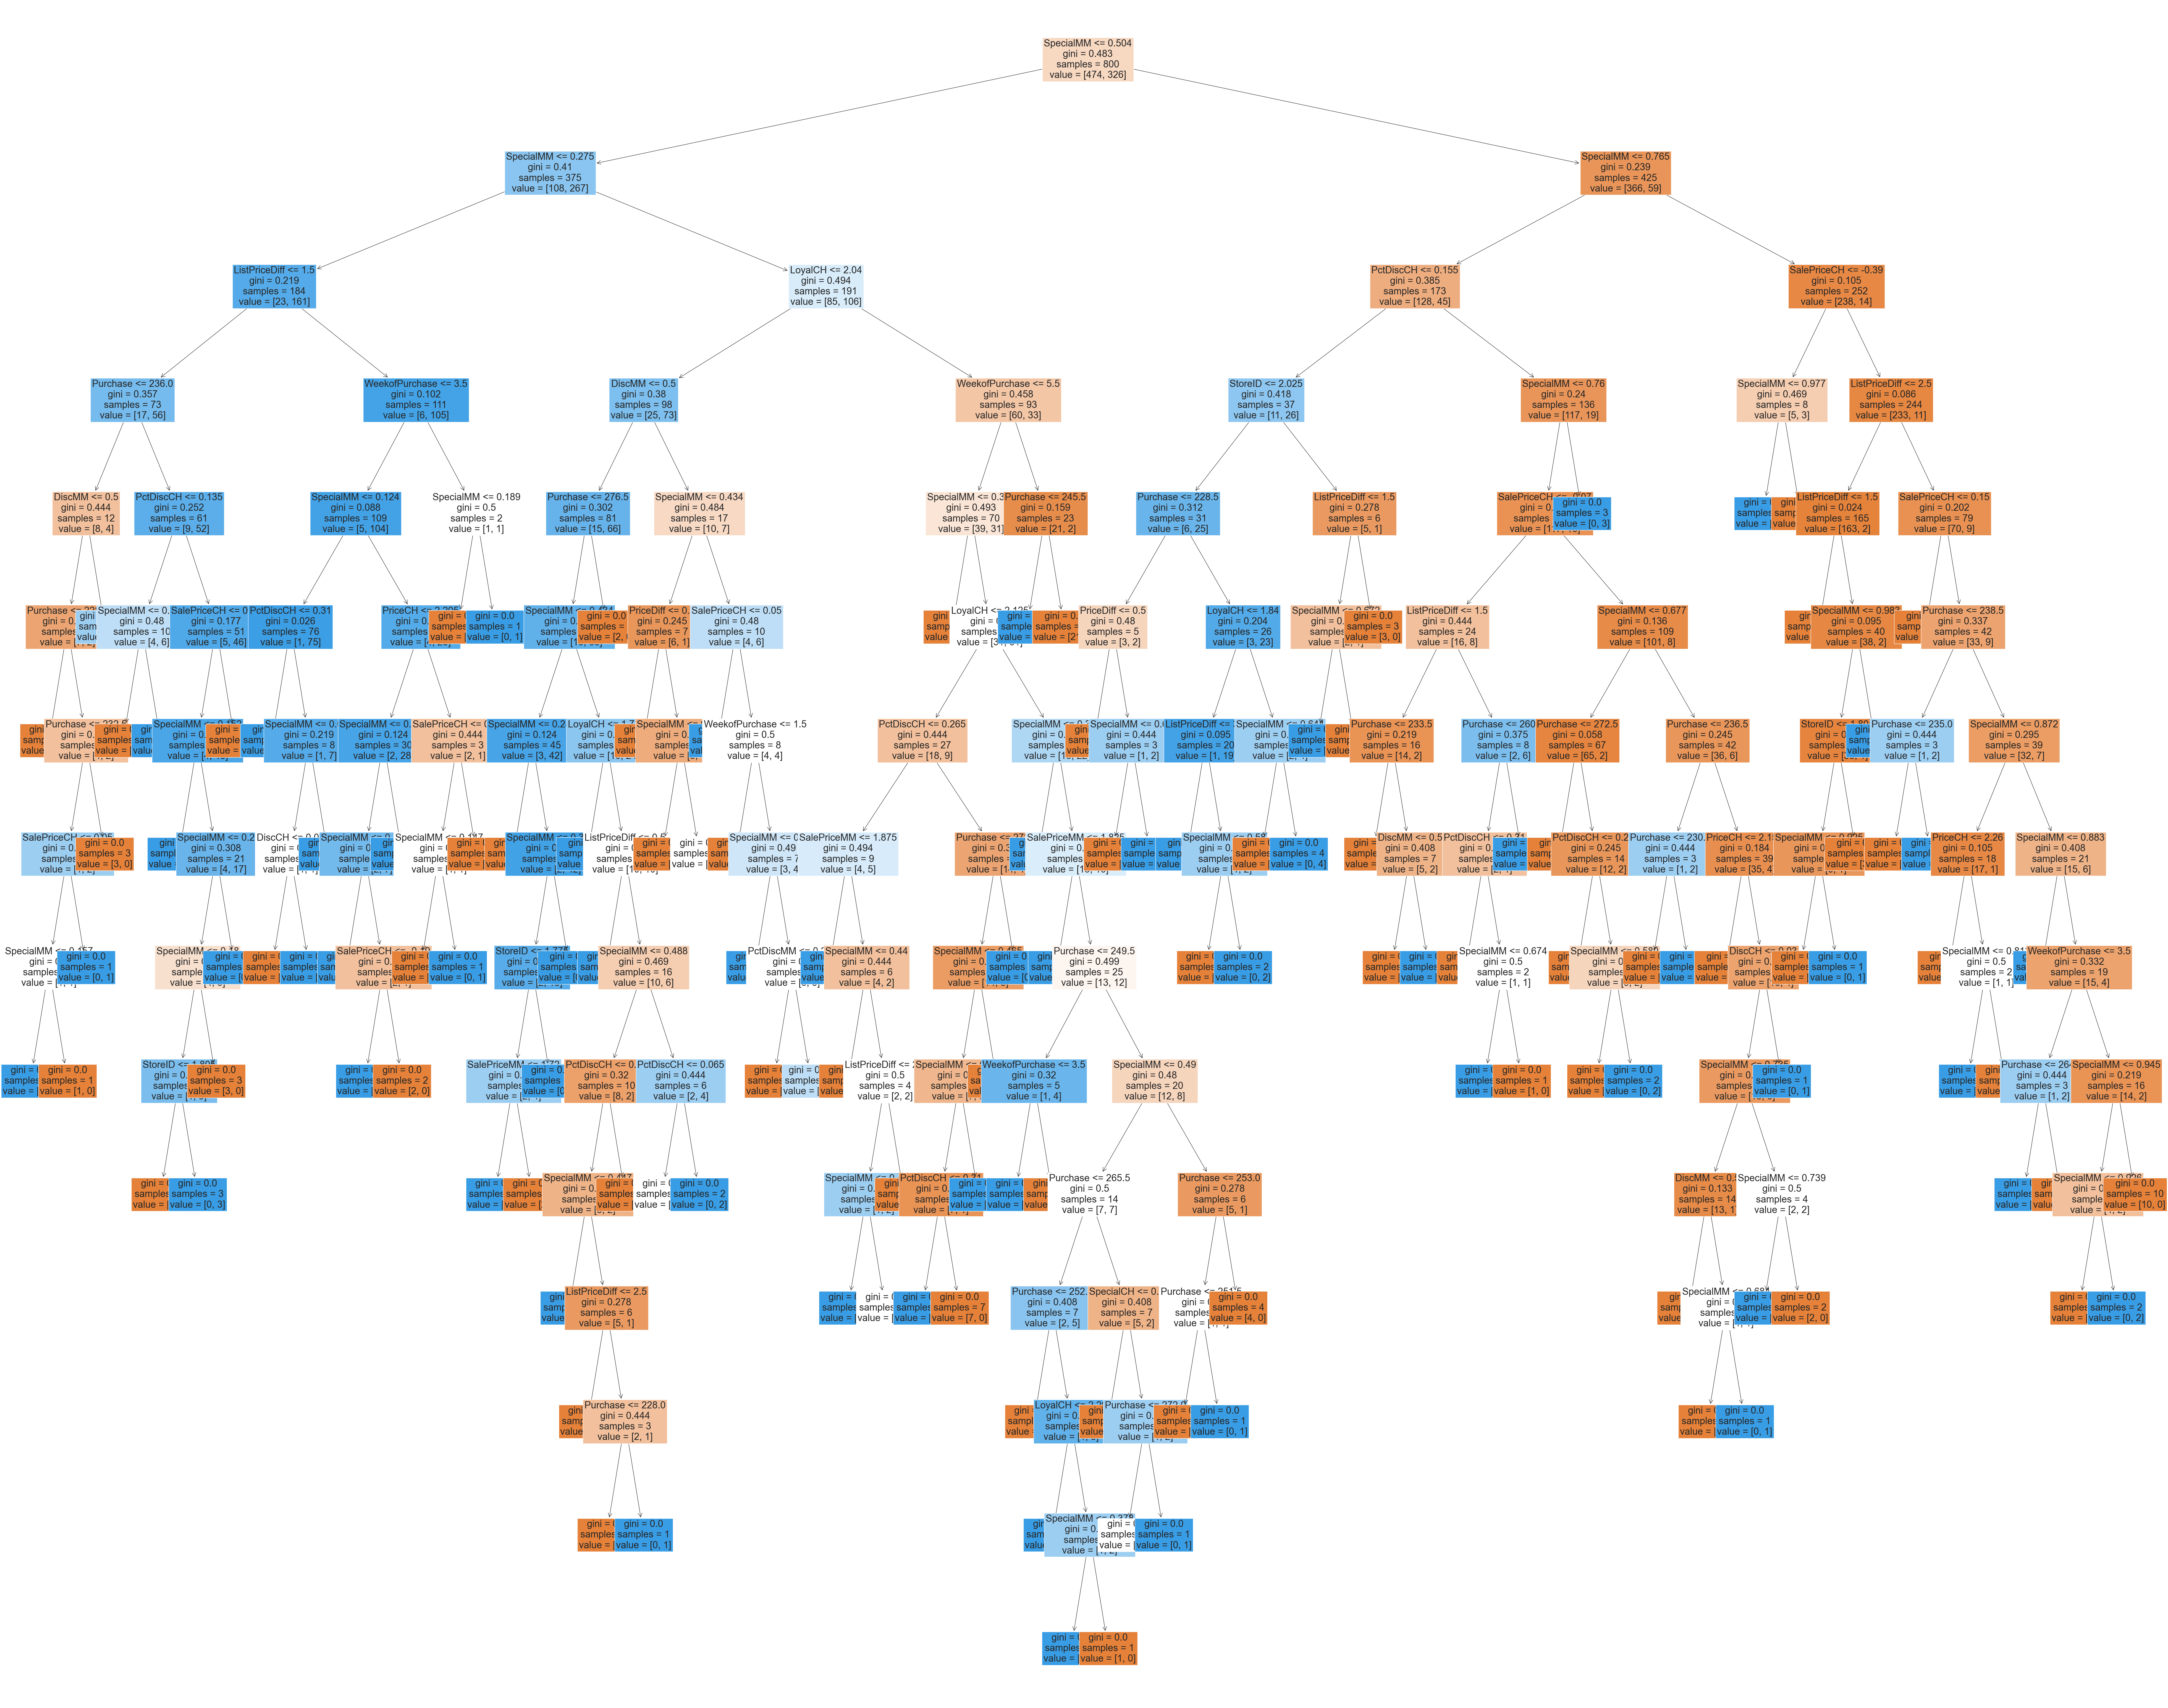

In [34]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (100,80))
tree.plot_tree(model,feature_names = oj.columns, filled = True,fontsize=25);

- Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

Test Error Rate : 0.09875
Classification Report for Test Data
              precision    recall  f1-score   support

          CH       0.92      0.91      0.92       487
          MM       0.87      0.88      0.87       313

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



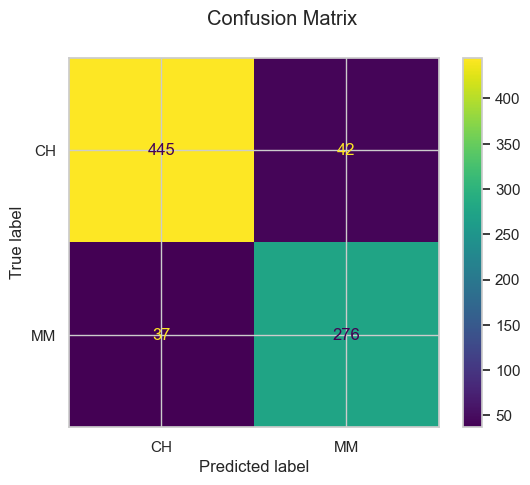

In [49]:
# Make predictions on the training data
y_pred = model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the test error rate
test_error_rate = 1 - accuracy_score(y_test, y_pred)

# Display the confusion matrix and test error rate
print("Test Error Rate :", test_error_rate)
print("Classification Report for Test Data")
print(classification_report(y_test, y_pred))

#plot confussion_matrix
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()
    

**Concept of Test Error rate:**

The test error rate is a key performance metric used to evaluate the effectiveness of a predictive model on new, unseen data. It quantifies the proportion of incorrect predictions made by the model when applied to a separate dataset that it has not seen during the training phase. The test error rate is crucial for assessing how well a model generalizes to real-world scenarios and its ability to make accurate predictions beyond the training data.

$ \text{Test Error Rate} = \frac{\text{Number of Incorrect Predictions on Test Data}}{\text{Total Number of Predictions on Test Data}} \times 100\% $

In the context of a classification problem, the test error rate reflects the percentage of misclassifications made by the model on the test dataset. A lower test error rate indicates better generalization performance, as it suggests that the model is effectively capturing patterns in the data and making accurate predictions on new instances.


- determine the optimal tree size and best score.

In [36]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameter values to search through
param_grid = {
    'max_depth': range(1, 21),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

# Use GridSearchCV to find the optimal hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print("Optimal Hyperparameters:", best_hyperparameters)
print("Best Score:", best_score)


Optimal Hyperparameters: {'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.8537500000000001


**Concept of each hyperparameters :**

1. **`max_depth`:** This hyperparameter controls the maximum depth or the maximum number of levels in the decision tree. A deeper tree can capture more complex relationships in the training data but may be prone to overfitting, meaning it might not generalize well to new, unseen data. 

2. **`min_samples_split`:** This hyperparameter defines the minimum number of samples required to split an internal node. It helps control the tree's growth by preventing splits that result in a small number of samples, which could lead to overfitting.

3. **`min_samples_leaf`:** This hyperparameter sets the minimum number of samples required to be in a leaf node. Similar to `min_samples_split`, it helps control the size of the leaf nodes and, consequently, the complexity of the tree.

4. **`max_features`:** This hyperparameter determines the maximum number of features considered for splitting a node. It can help prevent overfitting by limiting the number of features considered at each split. The values provided `([None, 'sqrt', 'log2'])` represent different strategies for selecting the maximum number of features. `None` means considering all features, `sqrt` means the square root of the total number of features, and `log2` means the logarithm base 2 of the total number of features.